In [28]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

In [29]:
dataset_dir = r"D:\Durian_model\data2" 

# Tạo generator để load ảnh và thực hiện data augmentation
datagen = ImageDataGenerator(
    rescale=1./255,  # Chuẩn hóa pixel từ 0-255 thành 0-1
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 20% dữ liệu làm tập validation
)

In [30]:
# Load tập huấn luyện
train_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(224, 224),  # Kích thước ảnh resize
    batch_size=16,
    class_mode='binary',  # 2 lớp
    subset='training'
)

Found 764 images belonging to 2 classes.


In [31]:
validation_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(224, 224),
    batch_size=16,
    class_mode='binary',
    subset='validation'
)

Found 190 images belonging to 2 classes.


In [32]:
# Xây dựng mô hình CNN
model = models.Sequential()

# Convolutional layer 1
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# Convolutional layer 2
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Convolutional layer 3
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Fully connected layer
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
model.add(layers.Dense(1, activation='sigmoid'))

# Compile mô hình
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

In [34]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True


In [35]:
# Huấn luyện mô hình
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=60,  # Có thể tăng số epoch nếu cần
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)


Epoch 1/60


c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 33s 655ms/step - accuracy: 0.5943 - loss: 1.7421 - val_accuracy: 0.5170 - val_loss: 0.6893
Epoch 2/60
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5625 - loss: 0.6729 - val_accuracy: 0.5714 - val_loss: 0.7000
Epoch 3/60


c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


47/47 ━━━━━━━━━━━━━━━━━━━━ 31s 641ms/step - accuracy: 0.7305 - loss: 0.5684 - val_accuracy: 0.5682 - val_loss: 0.7894
Epoch 4/60
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7500 - loss: 0.6603 - val_accuracy: 0.4286 - val_loss: 1.0126
Epoch 5/60
47/47 ━━━━━━━━━━━━━━━━━━━━ 31s 646ms/step - accuracy: 0.7691 - loss: 0.5024 - val_accuracy: 0.5852 - val_loss: 0.6954
Epoch 6/60
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8125 - loss: 0.4440 - val_accuracy: 0.4286 - val_loss: 0.8797
Epoch 7/60
47/47 ━━━━━━━━━━━━━━━━━━━━ 32s 650ms/step - accuracy: 0.8202 - loss: 0.4199 - val_accuracy: 0.6080 - val_loss: 0.7731
Epoch 8/60
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4375 - loss: 0.8360 - val_accuracy: 0.7143 - val_loss: 0.7891
Epoch 9/60
47/47 ━━━━━━━━━━━━━━━━━━━━ 32s 655ms/step - accuracy: 0.7446 - loss: 0.4745 - val_accuracy: 0.5852 - val_loss: 0.7405
Epoch 10/60
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8750 - loss: 0.3142 - val_accuracy: 0.6429 - val_los

In [36]:
# Đánh giá mô hình trên tập validation
loss, accuracy = model.evaluate(validation_generator)
print(f'Validation Accuracy: {100*accuracy:.2f}%')

12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 194ms/step - accuracy: 0.7057 - loss: 0.6040
Validation Accuracy: 73.16%


In [37]:
# Lưu mô hình đã huấn luyện sau khi quá trình huấn luyện kết thúc
model.save("D:/Durian_model/Durian_models/CNN_model/CNN_model.h5")


In [40]:
model.save("D:/Durian_model/Durian_models/CNN_model/CNN_model.keras")

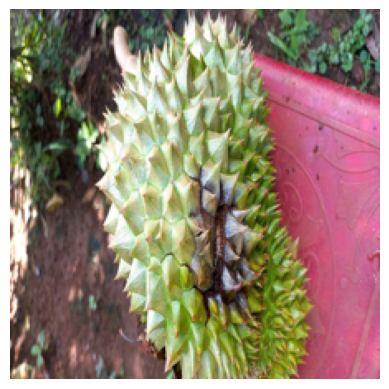

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Prediction: Rotten


In [38]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Tải mô hình đã huấn luyện
model = tf.keras.models.load_model('D:/Durian_model/Durian_models/CNN_model/CNN_model.h5')

# Hàm dự đoán ảnh bên ngoài
def predict_image(image_path):
    # Kích thước input của mô hình (INPUT_SIZE)
    INPUT_SIZE = (224, 224)  # Điều chỉnh theo kích thước bạn đã sử dụng trong quá trình huấn luyện

    # Load ảnh và xử lý ảnh
    img = Image.open(image_path)
    img = img.resize(INPUT_SIZE)  # Resize ảnh về kích thước INPUT_SIZE
    img = img.convert('RGB')  # Chuyển đổi ảnh thành dạng RGB nếu ảnh không phải RGB

    # Hiển thị ảnh
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    # Chuyển ảnh thành numpy array và chuẩn hóa giống như trong quá trình huấn luyện
    img_array = np.array(img) / 255.0  # Rescale
    img_array = np.expand_dims(img_array, axis=0)  # Thêm một chiều để phù hợp với input của mô hình

    # Dự đoán
    prediction = model.predict(img_array)

    # Đưa ra kết quả dự đoán (Good: 0, Rotten: 1)
    if prediction[0] < 0.5:
        print("Prediction: Good")
    else:
        print("Prediction: Rotten")

# Kiểm tra dự đoán với một ảnh
image_path = r"D:\Durian_model\Durian_models\test.jpg"  # Đường dẫn tới ảnh bên ngoài
predict_image(image_path)
